# Music and waves

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from IPython.display import Audio

In [2]:
def play(freq, duration=1):
    framerate = 44100   # <- rate of sampling
    t = np.linspace(0, duration, framerate * duration)    # time values
    data = np.sin(2 * np.pi * freq * t)
    
    fig, ax = plt.subplots()
    ax.plot(t[:1000], data[:1000])
    ax.grid(True, which='both')
    ax.axhline(y=0, color='k')
    ax.set(xlabel='time (s)',
           ylabel='amplitude')
    ax.set_title(f'Frequency = {freq} Hz')
    plt.show()
    return Audio(data, rate=framerate, autoplay=True)     # play sound

Mathematically, a sine wave is defined as:
$$y(t) = A \sin (2 \pi f t)$$

Frequency $f$ is measured in hertz (Hz), or complete cycles per second.

Play a single freqeuncy of 1000 Hz.

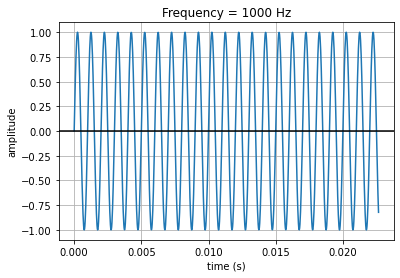

In [3]:
play(freq=1000, duration=1)   # play a sound for 1 second

Listen to different frequencies.

In [4]:
def sine_wave_wd(Frequency=1000):
    duration = 1
    framerate = 44100   # <- rate of sampling
    t = np.linspace(0, duration, framerate * duration)    # time values
    data = np.sin(2 * np.pi * Frequency * t)
    
    fig, ax = plt.subplots()
    ax.plot(t[:1000], data[:1000])
    ax.grid(True, which='both')
    ax.axhline(y=0, color='k')
    ax.set(xlabel='time (s)',
           ylabel='amplitude')
    ax.set_title(f'Frequency = {Frequency} Hz')
    plt.show()
    return Audio(data, rate=framerate, autoplay=True)

widgets.interact(sine_wave_wd, Frequency=(50, 5000));


interactive(children=(IntSlider(value=1000, description='Frequency', max=5000, min=50), Output()), _dom_classe…

This is also what distinguishes music from noise. Instead of generating a regular sine wave with a single frequency, what if we just generated a signal with random numbers?

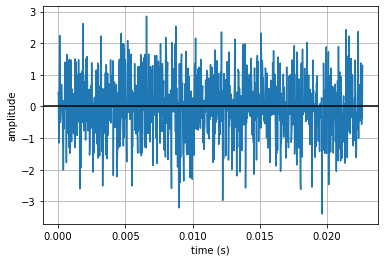

In [5]:
duration = 1
framerate = 44100   # <- rate of sampling
t = np.linspace(0, duration, framerate * duration)

data = np.random.randn(framerate * duration)

fig, ax = plt.subplots()
ax.plot(t[:1000], data[:1000])
ax.grid(True, which='both')
ax.axhline(y=0, color='k')
ax.set(xlabel='time (s)',
       ylabel='amplitude')
plt.show()

Audio(data, rate=44100, autoplay=True)

# Music and Multiplication
Previously we saw a sine wave visualized in regular cycles. When we think in terms of cycles per second, it means that for a given root frequency $f$, any power of 2 times $f$ will generate sine waves that start and end together.

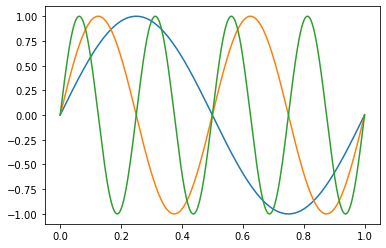

In [6]:
duration = 1

framerate = 44100   # <- rate of sampling
t = np.linspace(0, duration, framerate * duration)    # time values

fig, ax = plt.subplots()
ax.plot(t, np.sin(2 * np.pi * 1 * t))
ax.plot(t, np.sin(2 * np.pi * 2 * t))
ax.plot(t, np.sin(2 * np.pi * 4 * t))
plt.show()

Play the three sounds below. Did you hear that? Sounds like they have the same “quality”, just at a higher or lower level right? In music, we call the quality a "note" and the distance between these powers of two an “octave”. Now, if you still remember your Greek/Latin word roots, you should immediately be saying, “aha, octave means 8!” Indeed if you played a piano keyboard, you’ll see that there are 8 white keys between two keys of the same letter, representing that they’re of the same base frequency but differ by a power of 2.

Let's listen to a frequency $f$.

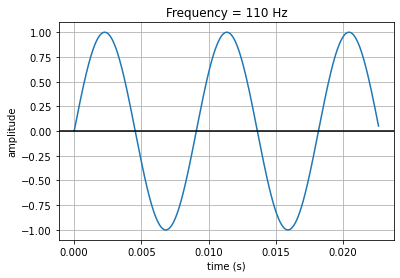

In [7]:
freq = 110

play(2**0 * freq) # any base frequency

Now listen to frequency $2f$.

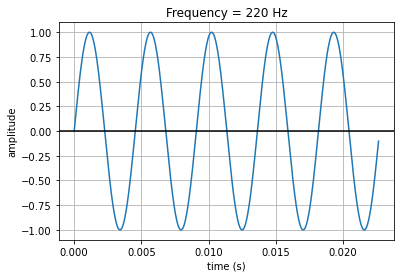

In [8]:
play(2**1 * freq)

Now listen to frequency $2^2f = 4f$.

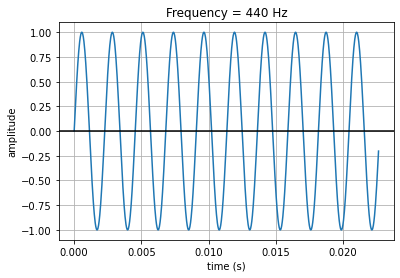

In [9]:
play(2**2 * freq)

And now listen to frequency $2^3f = 8f$.

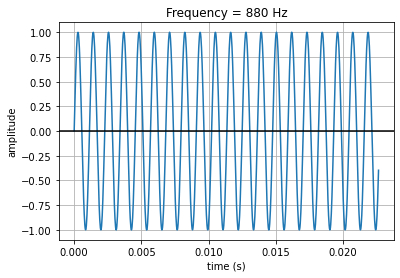

In [10]:
play(2**3 * freq)

Let's add the same note separated by an octave.

In [19]:
def sine_waves_3_wd(Frequency):
    duration = 1
    framerate = 44100   # <- rate of sampling
    t = np.linspace(0, duration, framerate * duration)    # time values
    data0 = np.sin(2**0 * np.pi * Frequency * t)
    data1 = np.sin(2**1 * np.pi * Frequency * t)
    data2 = np.sin(2**2 * np.pi * Frequency * t)
    data3 = np.sin(2**3 * np.pi * Frequency * t)
    
    data = data0 + data1 + data2 + data3
    
    fig, ax = plt.subplots()
    ax.plot(t[:1000], data[:1000])
    ax.grid(True, which='both')
    ax.axhline(y=0, color='k')
    ax.set(xlabel='time (s)',
           ylabel='amplitude')
    ax.set_title(f'Frequency =\
    {Frequency} + {2*Frequency} + {4*Frequency} + {8*Frequency} Hz')
    plt.show()
    return Audio(data, rate=framerate, autoplay=True)

widgets.interact(sine_waves_3_wd, Frequency=(50, 500));

interactive(children=(IntSlider(value=275, description='Frequency', max=500, min=50), Output()), _dom_classes=…

So where do the other notes come from? We can multiple numbers other than 2! You can play multiples of 3 or 5 to see how the sound changes.

Play a sound with frequency $3f$.

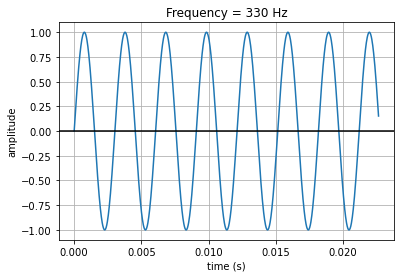

In [12]:
play(3 * freq)

Play a sound with frequency $5f$.

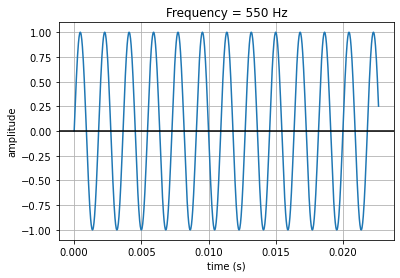

In [13]:
play(5 * freq)

# Combining three sine waves

In [14]:
def sine_waves_3_wd(freq0=1000, freq1=2000, freq2=4000):
    duration = 1
    framerate = 44100   # <- rate of sampling
    t = np.linspace(0, duration, framerate * duration)    # time values
    data0 = np.sin(2 * np.pi * freq0 * t)
    data1 = np.sin(2 * np.pi * freq1 * t)
    data2 = np.sin(2 * np.pi * freq2 * t)
    
    data = data0 + data1 + data2
    
    fig, ax = plt.subplots()
    ax.plot(t[:1000], data[:1000])
    ax.grid(True, which='both')
    ax.axhline(y=0, color='k')
    ax.set(xlabel='time (s)',
           ylabel='amplitude')
    ax.set_title(f'Frequency = {freq} Hz')
    plt.show()
    return Audio(data, rate=framerate, autoplay=True)

widgets.interact(sine_waves_3_wd, freq0=(50, 5000), freq1=(50, 5000), freq2=(50, 5000));

interactive(children=(IntSlider(value=1000, description='freq0', max=5000, min=50), IntSlider(value=2000, desc…

**References**

[Making Music](https://blog.changshe.io/making-music-in-a-jupyter-notebook-19c57791e636)

[Widgets](https://towardsdatascience.com/bring-your-jupyter-notebook-to-life-with-interactive-widgets-bc12e03f0916)

[Introduction to widgets video](https://www.youtube.com/watch?v=wb6k_T4rKBQ)

[Introduction to widgets GitHub](https://github.com/kimfetti/Videos/blob/master/ipywidgets/01_ipywidgets_intro.ipynb)